In [1]:
import os 
import sys 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.file_handlers import read_file_parameters
from figure_settings.settings import * 



In [2]:
EXPERIMENT_PATH = os.path.join(repo_root, 'exp', 'ex02')

In [3]:

df_path = os.path.join(EXPERIMENT_PATH, 'results', 'Convergence_Table.csv')
df = pd.read_csv(df_path).apply(pd.to_numeric, errors='ignore').drop(columns=['criterion'])
display(df.head().style.hide(axis='index'))

/tmp/ipykernel_38432/181933382.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = pd.read_csv(df_path).apply(pd.to_numeric, errors='ignore').drop(columns=['criterion'])


N,M,K,L,epoch,Ours,Zermello,Ours_bin,Zermello_bin
1000,1000,2,0,0,9,81,9,81
1000,1000,2,0,1,9,80,9,80
1000,1000,2,0,2,9,90,9,90
1000,1000,2,0,3,9,81,9,81
1000,1000,2,0,4,9,76,9,76


In [4]:
grouped = df.groupby(by=['N', 'M', 'K', 'L']).mean().reset_index().drop(columns=['epoch'])
grouped['R'] = grouped['M'] / grouped['N']
grouped['Higher_Order_Speedup'] = grouped['Zermello']/grouped['Ours']
grouped['Binary_Speedup'] = grouped['Zermello_bin']/grouped['Ours_bin']

### Ratio

In [5]:
ho_df = grouped[grouped['L'] == 0.0]

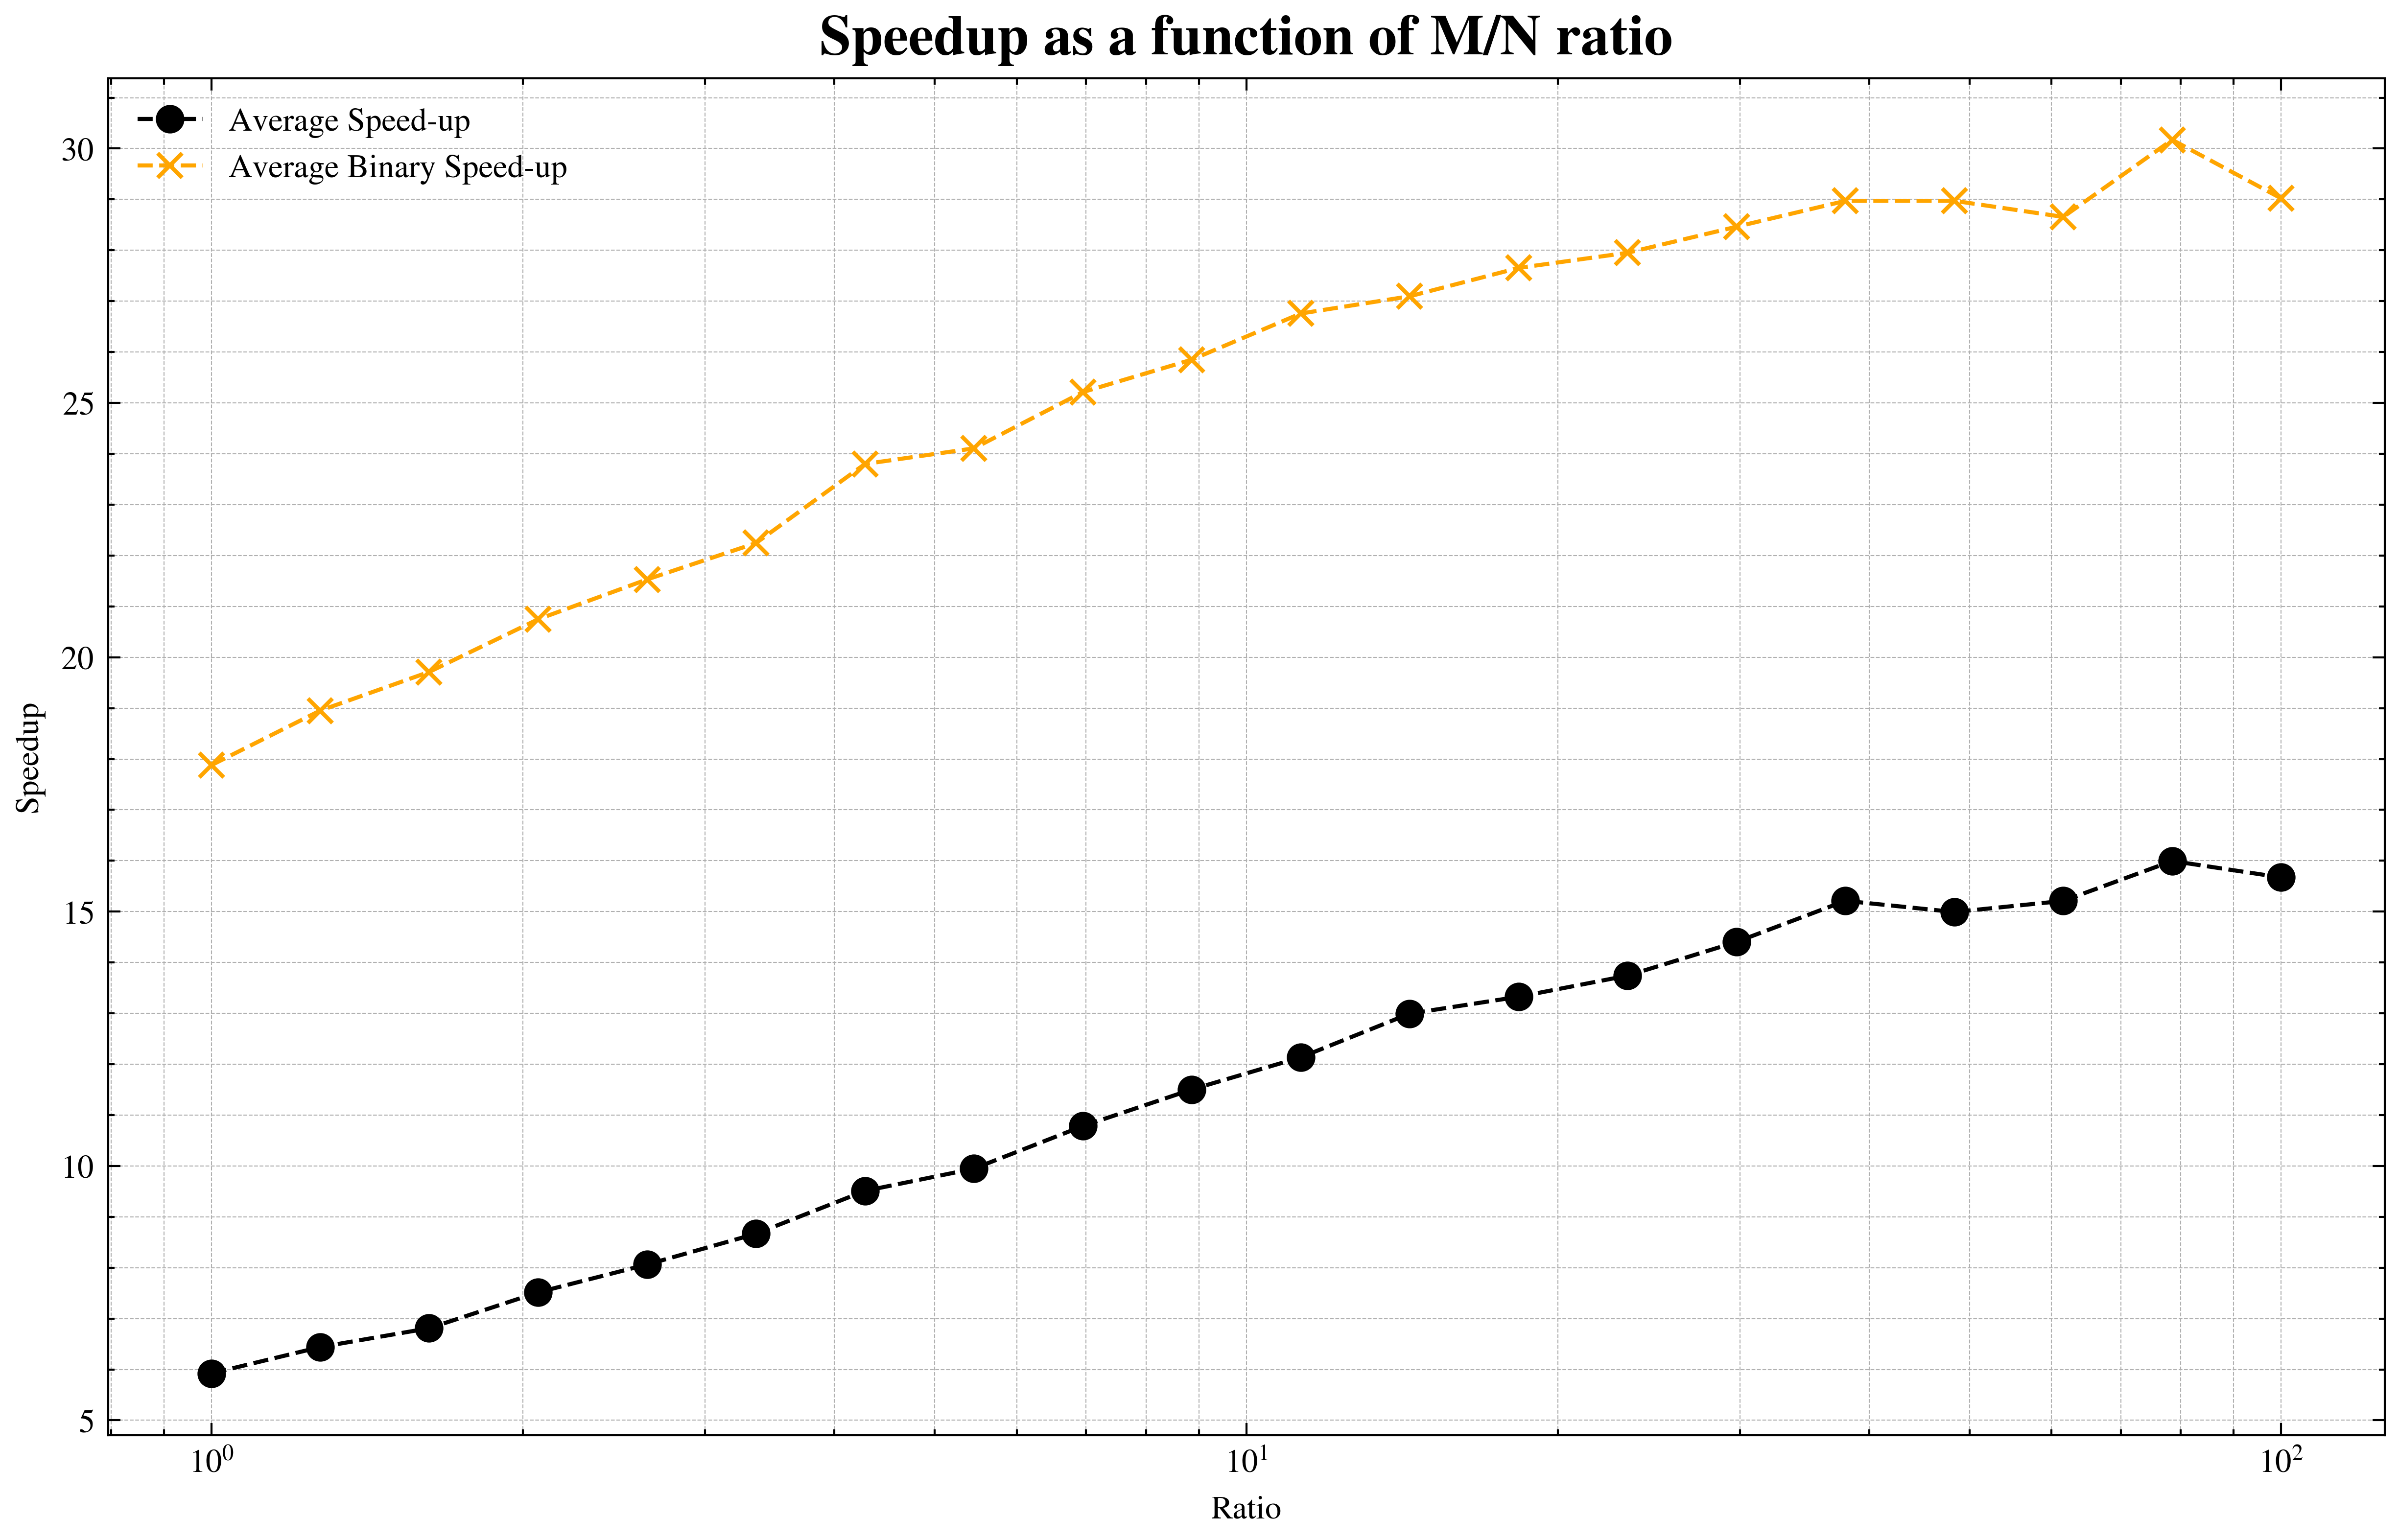

In [6]:

grouped = ho_df.groupby(by=['R']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Speedup as a function of M/N ratio',fontweight="bold", fontsize=14)
plt.plot(grouped['R'], grouped['Higher_Order_Speedup'], marker='o', color='black', linestyle = '--', label='Average Speed-up')
plt.plot(grouped['R'], grouped['Binary_Speedup'], marker='x', color='orange', linestyle = '--', label='Average Binary Speed-up')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.25)
plt.xscale('log')
plt.xlabel('Ratio')
plt.ylabel('Speedup')
plt.legend()

### Hyperedge Size

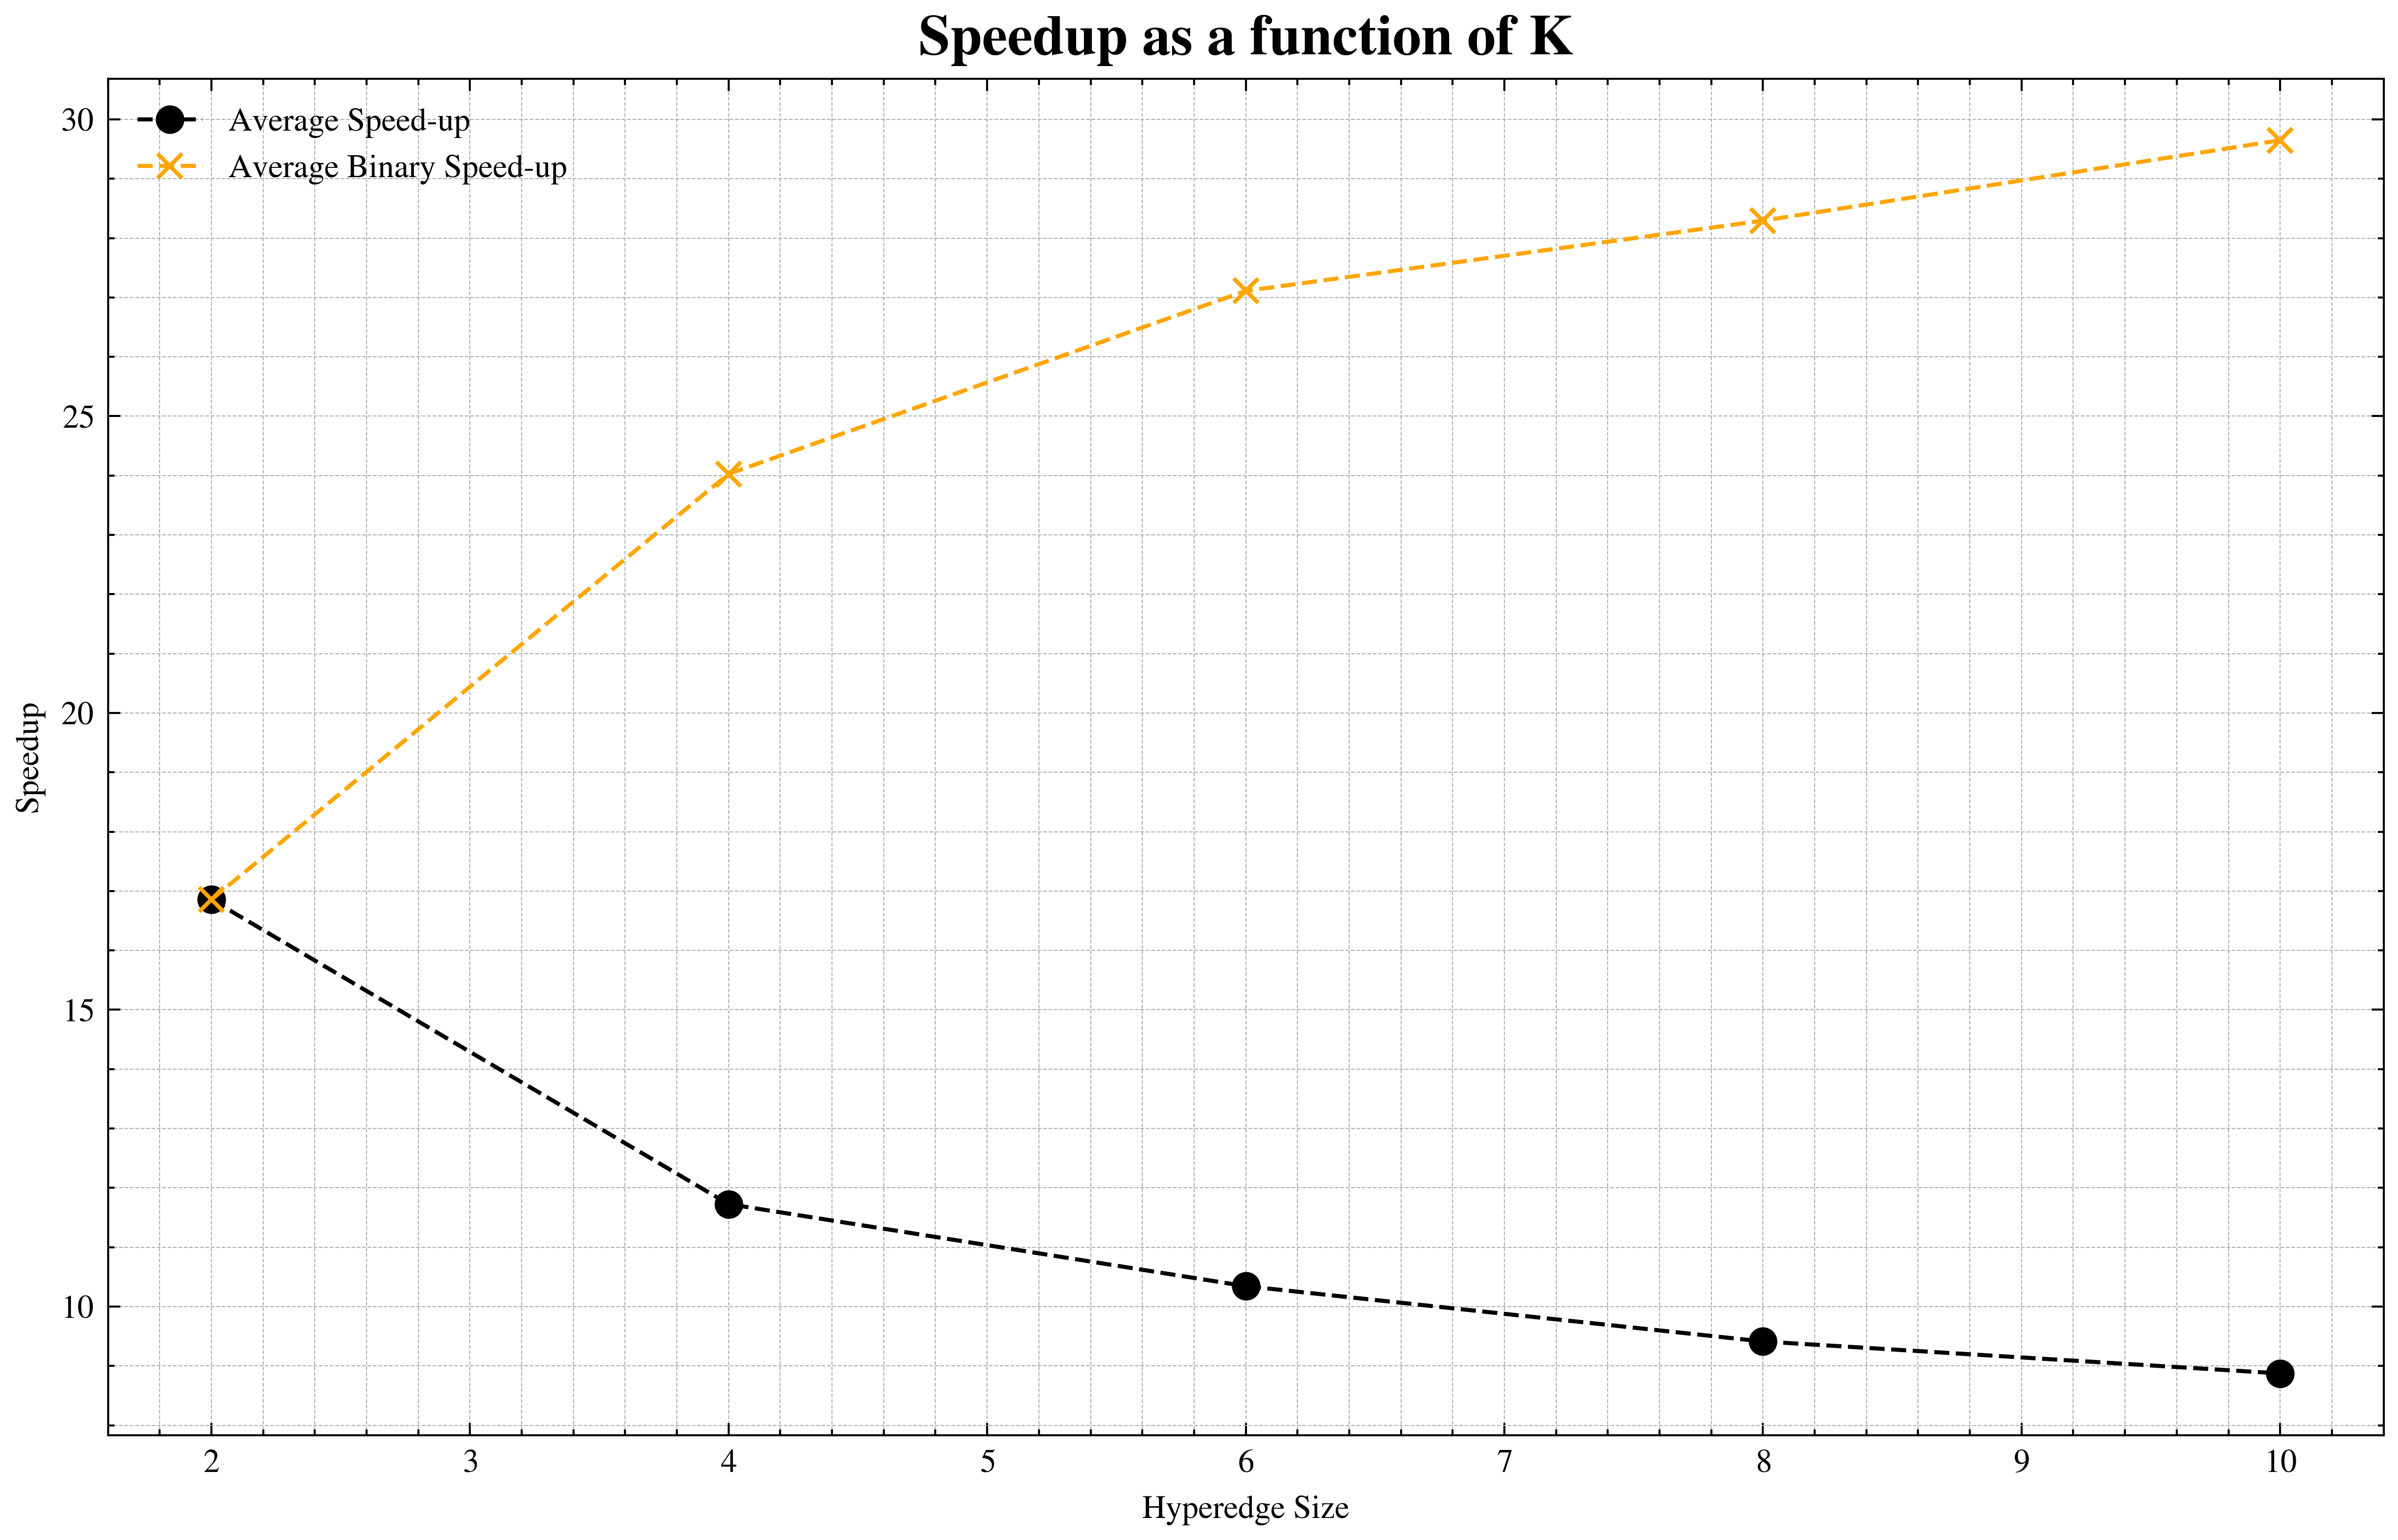

In [7]:
grouped = ho_df.groupby(by=['K']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Speedup as a function of K', fontweight="bold", fontsize=14)
plt.plot(grouped['K'], grouped['Higher_Order_Speedup'], marker='o', color='black', linestyle = '--', label='Average Speed-up')
plt.plot(grouped['K'], grouped['Binary_Speedup'],marker='x', color='orange', linestyle = '--', label='Average Binary Speed-up')
plt.xlabel('Hyperedge Size')
plt.ylabel('Speedup')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.25)
plt.legend()